In [1]:
# IO
import os

# Data
import numpy as np
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import cmcrameri  # nice colormaps
import astropy.units as u

In [2]:
from thesis.io import mesa
from thesis.physics import first_adiabatic_exponent, sound_speed, acoustic_depth

In [3]:
root_path = "/Users/ajl573/OneDrive/Data/MESA/solar_models/y0.28/"
profile_filename = "profile.data"
gyre_dir = "gyre"
gyre_suffix = "GYRE"

In [4]:
filename = os.path.join(root_path, profile_filename)
profile = mesa.load_dataset(filename, kind="profile")
# p = mesa.load_profile(path)
# mesa.load_mesa_gyre()
profile

<xarray.Dataset>
Dimensions:                 (zone: 763)
Coordinates:
  * zone                    (zone) int64 1 2 3 4 5 6 ... 758 759 760 761 762 763
Data variables:
    mass                    (zone) float64 1.0 1.0 1.0 ... 1.563e-07 7.813e-08
    logR                    (zone) float64 0.006006 0.006005 ... -2.936 -3.036
    logT                    (zone) float64 3.755 3.756 3.757 ... 7.19 7.19 7.19
    logRho                  (zone) float64 -6.788 -6.782 -6.776 ... 2.151 2.151
    logP                    (zone) float64 4.783 4.79 4.798 ... 17.35 17.35
    x_mass_fraction_H       (zone) float64 0.7304 0.7304 ... 0.3762 0.3762
    y_mass_fraction_He      (zone) float64 0.2515 0.2515 ... 0.6027 0.6027
    z_mass_fraction_metals  (zone) float64 0.0181 0.0181 ... 0.02109 0.02109
    acoustic_depth          (zone) float64 0.0 0.2495 ... 3.601e+03 3.601e+03
    pp                      (zone) float64 2.602e-26 2.638e-26 ... 15.44 15.44
    cno                     (zone) float64 0.0 0.0 0.0 0.0 ... 1.441 1.441 1.442
    tri_alpha               (zone) float64 0.0 0.0 0.0 ... 8.281e-41 8.287e-41
Attributes: (12/49)
    model_number:            211
    num_zones:               763
    initial_mass:            1.0
    initial_z:               0.02
    star_age:                4073344465.7814794
    time_step:               116394271.99836661
    ...                      ...
    MESA_SDK_version:        "x86_64-linux-22.6.1"
    math_backend:            "CRMATH"
    date:                    "20230117"
    msun:                    1.9884098706980504e+33
    rsun:                    69570000000.0
    lsun:                    3.828e+33

In [5]:
filename = os.path.join(root_path, ".".join([profile_filename, gyre_suffix]))
model = mesa.load_dataset(filename, kind="gyre")
model

<xarray.Dataset>
Dimensions:          (k: 1046)
Coordinates:
  * k                (k) int64 1 2 3 4 5 6 7 ... 1041 1042 1043 1044 1045 1046
Data variables: (12/18)
    r                (k) float64 0.0 6.399e+07 8.063e+07 ... 7.062e+10 7.062e+10
    m                (k) float64 0.0 1.554e+26 3.107e+26 ... 1.988e+33 1.988e+33
    L_r              (k) float64 0.0 2.625e+27 5.25e+27 ... 3.695e+33 3.695e+33
    P                (k) float64 2.22e+17 2.22e+17 2.22e+17 ... 93.64 91.76
    T                (k) float64 1.549e+07 1.549e+07 ... 4.78e+03 4.78e+03
    rho              (k) float64 141.5 141.5 141.5 ... 2.945e-10 2.885e-10
    ...               ...
    kappa_kappa_T    (k) float64 -2.505 -2.505 -2.505 -2.505 ... 0.0 0.0 0.0 0.0
    kappa_kappa_rho  (k) float64 0.4763 0.4764 0.4764 0.4764 ... 0.0 0.0 0.0 0.0
    eps              (k) float64 16.88 16.88 16.88 16.88 ... 0.0 0.0 0.0 0.0
    eps_eps_T        (k) float64 201.5 201.5 201.5 201.5 ... 0.0 0.0 0.0 0.0
    eps_eps_rho      (k) float64 17.76 17.76 17.76 17.76 ... 0.0 0.0 0.0 0.0
    Omega            (k) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    n:        1046
    M:        1.9884098706980504e+33
    R:        70538857450.55437
    L:        3.695049456876695e+33
    version:  101

In [6]:
path = os.path.join(root_path, gyre_dir, ".".join([profile_filename, gyre_suffix, "h5"]))
pulse = xr.load_dataset(path, engine="h5netcdf")
pulse

<xarray.Dataset>
Dimensions:  (k: 1046, n_pg: 36, l: 3)
Coordinates:
  * k        (k) int64 1 2 3 4 5 6 7 8 ... 1040 1041 1042 1043 1044 1045 1046
  * l        (l) int64 0 1 2
  * n_pg     (n_pg) int64 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
Data variables:
    As       (k, n_pg, l) float64 0.0 nan 0.0 0.0 ... 2.331e+03 nan nan
    E_norm   (n_pg, l) float64 0.005267 nan 0.002007 ... 8.809e-09 nan nan
    Gamma_1  (k, n_pg, l) float64 1.665 nan 1.665 1.665 ... 1.614 1.614 nan nan
    V_2      (k, n_pg, l) float64 125.5 nan 125.5 125.5 ... 5.896e+03 nan nan
    c_1      (k, n_pg, l) float64 0.009556 nan 0.009556 ... 1.003 nan nan
    freq     (n_pg, l) complex128 (255.42893986783676+0j) (nan+0j) ... (nan+0j)
    x        (k, n_pg, l) float64 0.0 nan 0.0 0.0 0.0 ... 1.001 1.001 nan nan
    xi_h     (k, n_pg, l) complex128 0j (nan+0j) 0j 0j ... 0j (nan+0j) (nan+0j)
    xi_r     (k, n_pg, l) complex128 0j (nan+0j) 0j ... (nan+0j) (nan+0j)
Attributes:
    freq_units:  UHZ
    label:

## First Adiabatic Exponent

Using model from Houdeyer et al. (2021).

In [7]:
n = 101
log_T_range = (3.5, 6.0)
log_rho_range = (-12.0, 0.0)
log_T = np.linspace(*log_T_range, n)
log_rho = np.linspace(*log_rho_range, n)

log_coords = np.meshgrid(log_T, log_rho)
coords = np.power(10, log_coords)

In [8]:
Y = profile.y_mass_fraction_He.sel(zone=1).values
gamma1 = first_adiabatic_exponent(*coords.reshape((2, n**2)), Y)
gamma1_at_coords = gamma1.reshape((n, n))

In [9]:
def latex_inline(unit):
    return unit.to_string("latex_inline")

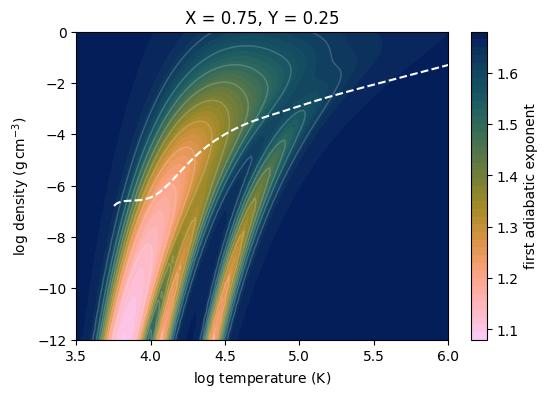

In [10]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

cf = ax.contourf(*log_coords, gamma1_at_coords, levels=51, cmap="cmc.batlow_r")

ax.contour(*log_coords, gamma1_at_coords, levels=9, colors="white", alpha=0.2, linewidths=1.0)

ax.plot(profile.logT, profile.logRho, "--", color="white")
ax.set_xlabel(f"log temperature ({latex_inline(u.K)})")
ax.set_ylabel(f"log density ({latex_inline(u.g / u.cm**3)})")
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlim(log_T_range)
ax.set_ylim(log_rho_range)
ax.set_title(f"X = {1 - Y:.2f}, Y = {Y:.2f}")

cbar = plt.colorbar(cf)
cbar.set_ticks(np.arange(1.1, 1.7, 0.1))
cbar.set_label("first adiabatic exponent");

## Pulsation profiles

In [11]:
model["cs"] = sound_speed(model.Gamma_1, model.P, model.rho)

tau = acoustic_depth(model.r, model.cs)
tau0 = tau.max()

model["tau"] = xr.DataArray(tau, dims=("k",))
model

<xarray.Dataset>
Dimensions:          (k: 1046)
Coordinates:
  * k                (k) int64 1 2 3 4 5 6 7 ... 1041 1042 1043 1044 1045 1046
Data variables: (12/20)
    r                (k) float64 0.0 6.399e+07 8.063e+07 ... 7.062e+10 7.062e+10
    m                (k) float64 0.0 1.554e+26 3.107e+26 ... 1.988e+33 1.988e+33
    L_r              (k) float64 0.0 2.625e+27 5.25e+27 ... 3.695e+33 3.695e+33
    P                (k) float64 2.22e+17 2.22e+17 2.22e+17 ... 93.64 91.76
    T                (k) float64 1.549e+07 1.549e+07 ... 4.78e+03 4.78e+03
    rho              (k) float64 141.5 141.5 141.5 ... 2.945e-10 2.885e-10
    ...               ...
    eps              (k) float64 16.88 16.88 16.88 16.88 ... 0.0 0.0 0.0 0.0
    eps_eps_T        (k) float64 201.5 201.5 201.5 201.5 ... 0.0 0.0 0.0 0.0
    eps_eps_rho      (k) float64 17.76 17.76 17.76 17.76 ... 0.0 0.0 0.0 0.0
    Omega            (k) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    cs               (k) float64 5.111e+07 5.111e+07 ... 7.165e+05 7.164e+05
    tau              (k) float64 3.71e+03 3.709e+03 ... 0.3365 -1.819e-12
Attributes:
    n:        1046
    M:        1.9884098706980504e+33
    R:        70538857450.55437
    L:        3.695049456876695e+33
    version:  101

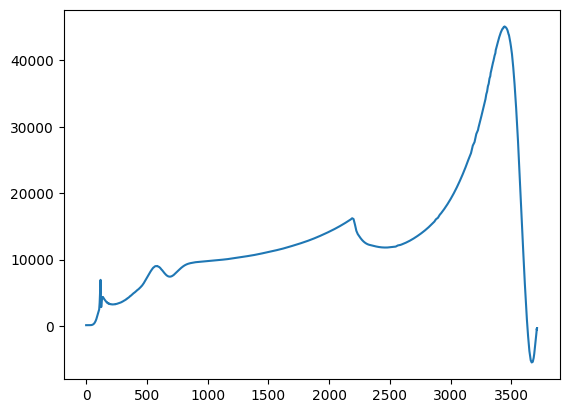

In [12]:
fig, ax = plt.subplots()

ax.plot(model.tau, np.gradient(model.cs, model.tau));

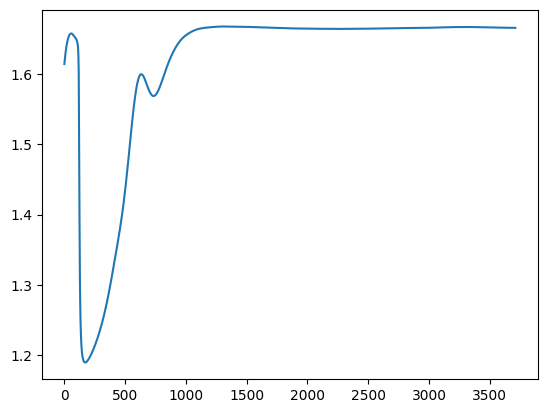

In [13]:
fig, ax = plt.subplots()

ax.plot(model.tau, model.Gamma_1);

In [17]:
from scipy.integrate import trapezoid, cumulative_trapezoid

In [264]:
pulse

<xarray.Dataset>
Dimensions:  (k: 1046, l: 3, n_pg: 36)
Coordinates:
  * k        (k) int64 1 2 3 4 5 6 7 8 ... 1040 1041 1042 1043 1044 1045 1046
  * l        (l) int64 0 1 2
  * n_pg     (n_pg) int64 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
Data variables:
    As       (k, n_pg, l) float64 0.0 nan 0.0 0.0 ... 2.331e+03 nan nan
    E_norm   (n_pg, l) float64 0.005267 nan 0.002007 ... 8.809e-09 nan nan
    Gamma_1  (k, n_pg, l) float64 1.665 nan 1.665 1.665 ... 1.614 1.614 nan nan
    V_2      (k, n_pg, l) float64 125.5 nan 125.5 125.5 ... 5.896e+03 nan nan
    c_1      (k, n_pg, l) float64 0.009556 nan 0.009556 ... 1.003 nan nan
    freq     (n_pg, l) complex128 (255.42893986783676+0j) (nan+0j) ... (nan+0j)
    x        (k, n_pg, l) float64 0.0 nan 0.0 0.0 0.0 ... 1.001 1.001 nan nan
    xi_h     (k, n_pg, l) complex128 0j (nan+0j) 0j 0j ... 0j (nan+0j) (nan+0j)
    xi_r     (k, n_pg, l) complex128 0j (nan+0j) 0j ... (nan+0j) (nan+0j)
    div_xi   (k, n_pg, l) float64 5.977e-12 nan -2.573e-10 ... 1.662e-05 nan nan
Attributes:
    freq_units:  UHZ
    label:

In [307]:
import astropy.constants as const
G = const.G.cgs.value

def gradient(y, *varargs, axis=None, edge_order=1):
    z = np.gradient(y, *varargs, axis=axis, edge_order=edge_order)    
    return xr.DataArray(z, dims=y.dims)

def integrate(y, x=None, dx=1.0, axis=-1):
    z = trapezoid(y, x=x, dx=dx, axis=axis)
    dims = tuple(d for d in y.dims if d != y.dims[axis])
    return xr.DataArray(z, dims=dims)
    
def cumulative_integrate(y, x=None, dx=1.0, axis=-1, initial=None):
    z = cumulative_trapezoid(y, x=x, dx=dx, axis=axis, initial=initial)
    return xr.DataArray(z, dims=y.dims)

def complement(y, x=None, dx=1.0, axis=-1, initial=None):
    return integrate(y, x=x, dx=dx, axis=axis) - cumulative_integrate(y, x=x, dx=dx, axis=axis, initial=initial)

def to_rad_per_sec(freq, freq_units, mass, radius):
    factor = {
        "NONE": np.sqrt(G * mass / radius**3),
        "HZ": 2.0 * np.pi,
        "UHZ": 2e-6 * np.pi,
        "RAD_PER_SEC": 1.0,
        "CYC_PER_DAY": 2.0 * np.pi / 86400.0
    }
    return factor[freq_units] * freq 

def kernel(pulse, model):
    """Returns a dict of structural kernels.
    """

    # Constants
    M = model.attrs["M"]
    R = model.attrs["R"]

    # Profile data
    r = model["r"]             # radial co-ordinate
    m = model["m"]             # mass co-ordinate
    P = model["P"]             # pressure
    rho = model["rho"]         # density
    Gamma1 = model["Gamma_1"]  # first adiabatic index
    c2 = Gamma1*P/rho          # square of the sound speed
    
    u = 1/r
    u[0] = 0.0  # need better solution to this!

    # Pulsation data
    xi_r = pulse["xi_r"].real  # radial component of eigenfunction
    xi_h = pulse["xi_h"].real  # horiz. component of eigenfunction
    
#     omega = 2.*np.pi*pulse["freq"].real*1e-6  # convert to angular frequency
    omega = to_rad_per_sec(pulse["freq"].real, pulse.attrs["freq_units"], M, R)

    ell = pulse["l"]
    L2 = ell * (ell + 1)
    L = np.sqrt(L2)
    
    drho_dr = gradient(rho, r)
    dxi_r_dr = gradient(xi_r, r, axis=0)
    
    chi = dxi_r_dr + 2*xi_r * u - L2*xi_h * u
    
    S = integrate(r**2 * rho * (xi_r**2 + L2 * xi_h**2), r, axis=0)
    
    K_c2_rho = 0.5 * r**2 * rho * c2 * chi**2 / S / omega**2
    
    alpha = rho * (chi + 0.5 * xi_r * drho_dr / rho) * xi_r
    beta = (rho * chi + xi_r * drho_dr)

    K_rho_c2 = (
        - 0.5 * (xi_r**2 + L2*xi_h**2) * rho * omega**2 * r**2
        + 0.5 * rho * c2 * chi**2 * r**2 - G * m * alpha
        - 4 * np.pi * G * rho * r**2 * complement(alpha, r, axis=0, initial=0.0)
        + G * m * rho * xi_r * dxi_r_dr
        + 0.5 * G * (m * drho_dr + 4 * np.pi * rho**2 * r**2) * xi_r**2
        # These last terms have negligable effect! Why?
        - 4 * np.pi * G / (2 * ell + 1) * rho * (
            (ell + 1) * u**ell * (xi_r - ell * xi_h)
            * cumulative_integrate(beta * r**(ell + 2), r, axis=0, initial=0.0)
            - ell * r**(ell + 1) * (xi_r + (ell + 1) * xi_h)
            * complement(beta * r * u**ell, r, axis=0, initial=0.0)
        )
    ) / S / omega**2
    
    # No idea how to verify this next stuff
    K_G1_rho = K_c2_rho

    alpha = rho * u**2 * cumulative_integrate(K_c2_rho / P, r, axis=0, initial=0.0)

    K_rho_G1 = (
        K_rho_c2 - K_c2_rho + G * m * alpha
        + 4 * np.pi * G * rho * r**2 * complement(alpha, r, axis=0, initial=0.0)
    )

    # Next do helium, where we need some Gamma derivatives from EOS
    return {
        ("c2", "rho"): (K_c2_rho, K_rho_c2),
        ("G1", "rho"): (K_G1_rho, K_rho_G1),
    }

In [308]:
K = kernel(pulse, model)
K1, K2 = K[("c2", "rho")]
K3, K4 = K[("G1", "rho")]

The kernels show the sensitivity of omega to a change in structure. E.g. a change in sound speed squared at fixed density.

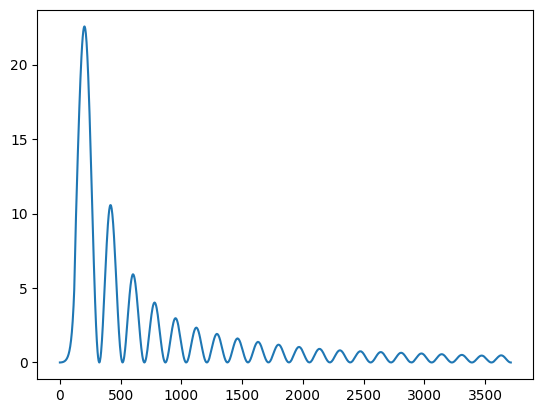

In [315]:
plt.plot(model.tau, model.R*K1.loc[:, 21, 0])

Or a change in density at fixed sound speed.

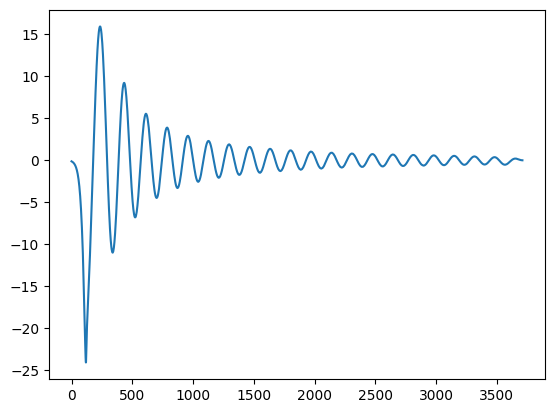

In [316]:
plt.plot(model.tau, model.R*K2.loc[:, 21, 0])

These would be integrated over to get the total change in omega due to changes in both sound speed and density. The latter would probably integrate out to zero, but the first would have a greater effect.

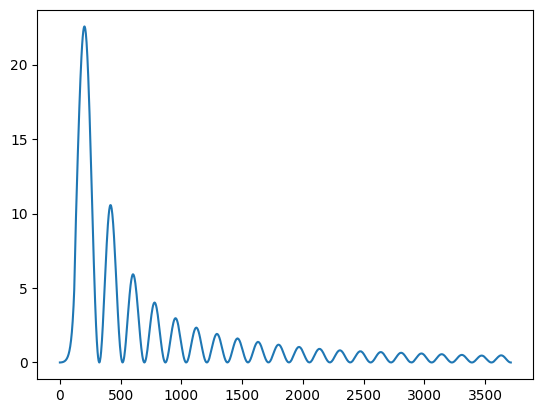

In [317]:
plt.plot(model.tau, model.R*K3.loc[:, 21, 0])

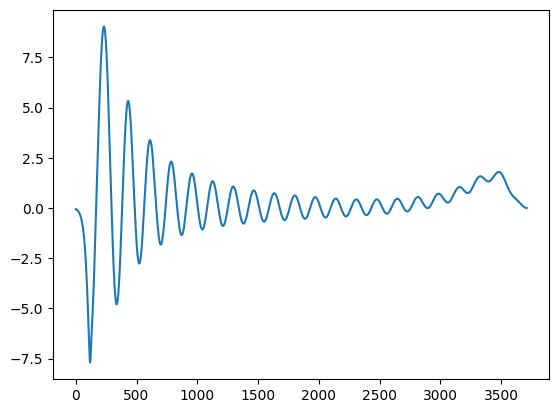

In [321]:
plt.plot(model.tau, model.R*K4.loc[:, 21, 0])

In [329]:
pulse

<xarray.Dataset>
Dimensions:  (k: 1046, l: 3, n_pg: 36)
Coordinates:
  * k        (k) int64 1 2 3 4 5 6 7 8 ... 1040 1041 1042 1043 1044 1045 1046
  * l        (l) int64 0 1 2
  * n_pg     (n_pg) int64 1 2 3 4 5 6 7 8 9 10 ... 27 28 29 30 31 32 33 34 35 36
Data variables:
    As       (k, n_pg, l) float64 0.0 nan 0.0 0.0 ... 2.331e+03 nan nan
    E_norm   (n_pg, l) float64 0.005267 nan 0.002007 ... 8.809e-09 nan nan
    Gamma_1  (k, n_pg, l) float64 1.665 nan 1.665 1.665 ... 1.614 1.614 nan nan
    V_2      (k, n_pg, l) float64 125.5 nan 125.5 125.5 ... 5.896e+03 nan nan
    c_1      (k, n_pg, l) float64 0.009556 nan 0.009556 ... 1.003 nan nan
    freq     (n_pg, l) complex128 (255.42893986783676+0j) (nan+0j) ... (nan+0j)
    x        (k, n_pg, l) float64 0.0 nan 0.0 0.0 0.0 ... 1.001 1.001 nan nan
    xi_h     (k, n_pg, l) complex128 0j (nan+0j) 0j 0j ... 0j (nan+0j) (nan+0j)
    xi_r     (k, n_pg, l) complex128 0j (nan+0j) 0j ... (nan+0j) (nan+0j)
    div_xi   (k, n_pg, l) float64 5.977e-12 nan -2.573e-10 ... 1.662e-05 nan nan
Attributes:
    freq_units:  UHZ
    label:

In [331]:
(13.59844 * u.electronvolt).cgs

<Quantity 2.17871028e-11 erg>